In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iop_dir = "/glade/work/sturbeville/E3SM/inputdata/atm/cam/scam/iop/"
run_dir = "/glade/work/sturbeville/DPSCREAM_simulations/all_run_files/"

# 304K sst with ls ascent

In [3]:
iop_file = iop_dir + "RCE_iopfile_4scam_smooth-mean-ascent.nc"
ls4k_file = run_dir + "scream_dp_RCE_SMALL_3km_lsascent_304ksst.eam.h0.2000-01-01-00000.nc"
new_iop_file = iop_dir + "RCE_iopfile_4scam_smooth-mean-ascent_304ksst.nc"

In [4]:
ds = xr.open_dataset(ls4k_file).isel(time=slice(-10*8,-1))["T"]  # last ten days
temp = ds.mean(dim=['time','ncol']).values
temp = temp[np.newaxis,:,np.newaxis,np.newaxis]
temp = np.repeat(temp, 2, axis=0)

(2, 72, 1, 1)
(2, 72, 1, 1)


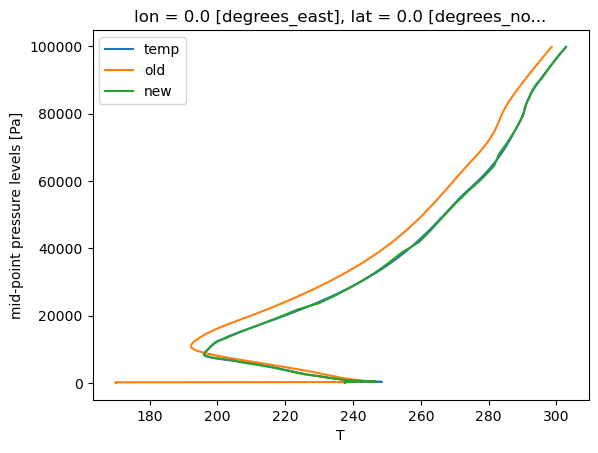

In [5]:
iop = xr.open_dataset(iop_file)
print(iop['T'].shape)
temp = xr.DataArray(temp, dims=['time','lev','lat','lon'],
                    coords={'time':iop.time,'lev':ds.lev*100,
                            'lat':iop.lat,'lon':iop.lon},
                    attrs=iop['T'].attrs)
temp[0,:,0,0].plot(y='lev', label='temp')
iop['T'][0,:,0,0].plot(y='lev', label='old')
new_temp = temp.sel(lev=iop.lev, method='nearest').values
print(new_temp.shape)
iop['T'] = (['time','lev','lat','lon'],new_temp)
iop['T'][0,:,0,0].plot(y='lev', label='new')
plt.legend()
plt.show()

In [7]:
iop.attrs["setup"] = "avg profile of temp from last ten days of small domain and with smooth mean ascent and 304K SSTs"
iop

<xarray.Dataset> Size: 4kB
Dimensions:  (lon: 1, lat: 1, lev: 72, time: 2)
Coordinates:
  * lon      (lon) float32 4B 0.0
  * lat      (lat) float32 4B 0.0
  * lev      (lev) float32 288B 12.38 18.28 26.99 ... 9.938e+04 9.985e+04
Dimensions without coordinates: time
Data variables: (12/13)
    tsec     (time) int32 8B ...
    bdate    int32 4B ...
    Ps       (time, lat, lon) float32 8B ...
    Tg       (time, lat, lon) float32 8B ...
    Ptend    (time, lat, lon) float32 8B ...
    phis     (time, lat, lon) float32 8B ...
    ...       ...
    q        (time, lev, lat, lon) float32 576B ...
    u        (time, lev, lat, lon) float32 576B ...
    v        (time, lev, lat, lon) float32 576B ...
    omega    (time, lat, lon, lev) float32 576B ...
    divT     (time, lev, lat, lon) float32 576B ...
    divq     (time, lev, lat, lon) float32 576B ...
Attributes:
    description:  Forcing for GABLS
    setup:        avg profile of temp from last ten days of small domain and ...

In [8]:
iop.to_netcdf(new_iop_file)

# LS ascent temperature profile used with smooth mean ascent

In [3]:
iop_file = iop_dir + "RCE_iopfile_4scam_smooth-mean-ascent.nc"
ls_file = run_dir + "scream_dp_RCE_SMALL_3km_i_lsascent_a.eam.h0.2000-01-01-00000.nc"
new_iop_file = iop_dir + "RCE_iopfile_4scam_smooth-mean-ascent_lsascent.nc"

In [37]:
ds = xr.open_dataset(ls_file).isel(time=slice(-10*8,-1))["T"]  # last ten days
temp = ds.mean(dim=['time','ncol']).values
temp = temp[np.newaxis,:,np.newaxis,np.newaxis]
temp = np.repeat(temp, 2, axis=0)
temp.shape

(2, 128, 1, 1)

(2, 72, 1, 1)
(2, 72, 1, 1)


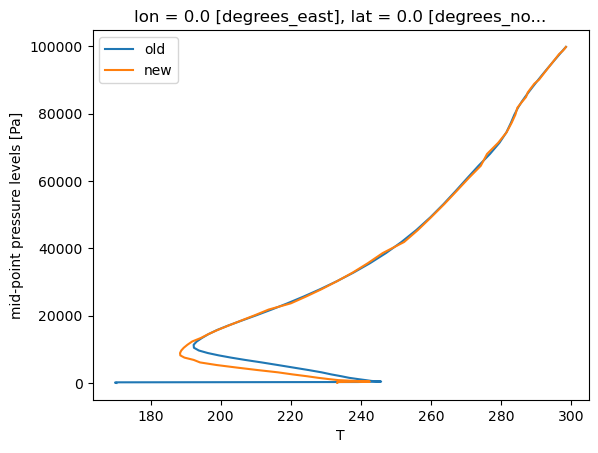

In [39]:
iop = xr.open_dataset(iop_file)
print(iop['T'].shape)
temp = xr.DataArray(temp, dims=['time','lev','lat','lon'],
                    coords={'time':iop.time,'lev':ds.lev*100,
                            'lat':iop.lat,'lon':iop.lon},
                    attrs=iop['T'].attrs)
iop['T'][0,:,0,0].plot(y='lev', label='old')
new_temp = temp.sel(lev=iop.lev, method='nearest').values
print(new_temp.shape)
iop['T'] = (['time','lev','lat','lon'],new_temp)
iop['T'][0,:,0,0].plot(y='lev', label='new')
plt.legend()
plt.show()

In [42]:
iop.attrs["setup"] = "avg profile of temp from last ten days of small domain and with smooth mean ascent"
iop

<xarray.Dataset> Size: 4kB
Dimensions:  (lon: 1, lat: 1, lev: 72, time: 2)
Coordinates:
  * lon      (lon) float32 4B 0.0
  * lat      (lat) float32 4B 0.0
  * lev      (lev) float32 288B 12.38 18.28 26.99 ... 9.938e+04 9.985e+04
Dimensions without coordinates: time
Data variables: (12/13)
    tsec     (time) int32 8B ...
    bdate    int32 4B ...
    Ps       (time, lat, lon) float32 8B ...
    Tg       (time, lat, lon) float32 8B ...
    Ptend    (time, lat, lon) float32 8B ...
    phis     (time, lat, lon) float32 8B ...
    ...       ...
    q        (time, lev, lat, lon) float32 576B ...
    u        (time, lev, lat, lon) float32 576B ...
    v        (time, lev, lat, lon) float32 576B ...
    omega    (time, lat, lon, lev) float32 576B ...
    divT     (time, lev, lat, lon) float32 576B ...
    divq     (time, lev, lat, lon) float32 576B ...
Attributes:
    description:  Forcing for GABLS
    setup:        avg profile of temp from last ten days of small domain and ...

In [44]:
iop.to_netcdf(new_iop_file)

# more moist for quicker nucleation

In [ ]:
iop_file = iop_dir + "RCE_iopfile_4scam_no-mean-ascent.nc"

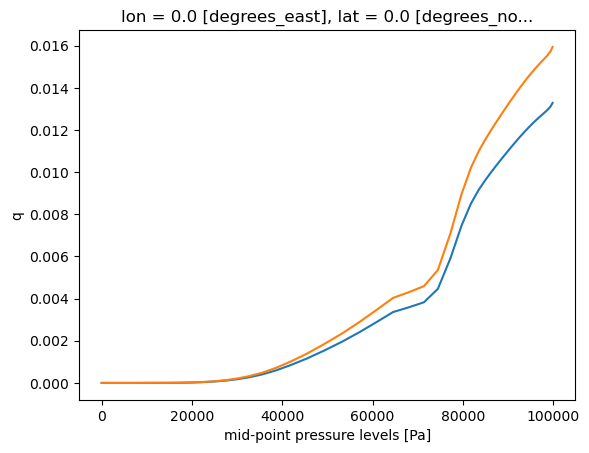

In [5]:
ds = xr.open_dataset(iop_file)
ds.q.isel(time=0).isel(lat=0).isel(lon=0).plot()
ds["q"] = ds.q*1.2
ds.q.isel(time=0).isel(lat=0).isel(lon=0).plot()
plt.show()

In [6]:
ds

<xarray.Dataset> Size: 5kB
Dimensions:  (lon: 1, lat: 1, lev: 72, time: 2)
Coordinates:
  * lon      (lon) float32 4B 0.0
  * lat      (lat) float32 4B 0.0
  * lev      (lev) float32 288B 12.38 18.28 26.99 ... 9.938e+04 9.985e+04
Dimensions without coordinates: time
Data variables: (12/13)
    tsec     (time) int32 8B ...
    bdate    int32 4B ...
    Ps       (time, lat, lon) float32 8B ...
    Tg       (time, lat, lon) float32 8B ...
    Ptend    (time, lat, lon) float32 8B ...
    phis     (time, lat, lon) float32 8B ...
    ...       ...
    q        (time, lev, lat, lon) float32 576B 1.2e-12 1.2e-12 ... 0.01595
    u        (time, lev, lat, lon) float32 576B ...
    v        (time, lev, lat, lon) float32 576B ...
    omega    (time, lev, lat, lon) float64 1kB ...
    divT     (time, lev, lat, lon) float32 576B ...
    divq     (time, lev, lat, lon) float32 576B ...
Attributes:
    description:  Forcing for GABLS

In [7]:
ds.to_netcdf(iop_file[:-3]+"qmoistx1.2.nc")